<a href="https://colab.research.google.com/github/Elwing-Chou/tibaml0315/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import cifar10
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 15s 0us/step


In [2]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [3]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [4]:
trans = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck",
]

dog


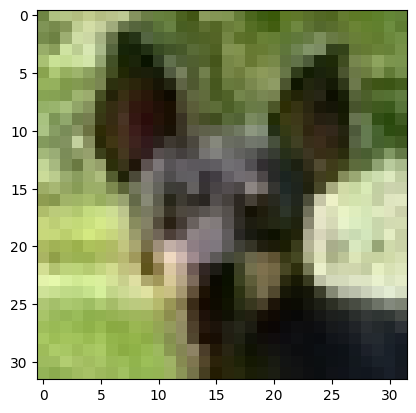

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 灰階圖片(0: 黑色 255: 白色)
idx = 2500
print(trans[y_train[idx]])
plt.imshow(x_train[idx])

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

layers = [
    # 1個filter(3 * 3 * 3) * 64(種) + 64(bias) -> 1792
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 1個filter(3 * 3 * 64) * 128(種) + 128(bias) -> 73856
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(512, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    GlobalAveragePooling2D(),
    # 256 * 10 + 10(bias)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 256)        0

In [7]:
# x: 0~1
# y: 配合loss這邊做Sparse
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [8]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       metrics=["accuracy"],
       optimizer="adam")

In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
c = [
    ModelCheckpoint("cnn.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train,
     batch_size=100,
     epochs=40,
     validation_split=0.1,
     callbacks=c)

Epoch 1/40
450/450 [==============================] - 17s 12ms/step - loss: 1.5627 - accuracy: 0.4231 - val_loss: 1.3150 - val_accuracy: 0.5240
Epoch 2/40
450/450 [==============================] - 5s 11ms/step - loss: 1.1084 - accuracy: 0.6015 - val_loss: 0.9432 - val_accuracy: 0.6714
Epoch 3/40
450/450 [==============================] - 5s 11ms/step - loss: 0.8875 - accuracy: 0.6867 - val_loss: 0.8009 - val_accuracy: 0.7214
Epoch 4/40
450/450 [==============================] - 5s 11ms/step - loss: 0.7428 - accuracy: 0.7394 - val_loss: 0.7216 - val_accuracy: 0.7520
Epoch 5/40
450/450 [==============================] - 5s 11ms/step - loss: 0.6341 - accuracy: 0.7793 - val_loss: 0.6734 - val_accuracy: 0.7728
Epoch 6/40
450/450 [==============================] - 5s 12ms/step - loss: 0.5461 - accuracy: 0.8110 - val_loss: 0.7024 - val_accuracy: 0.7636
Epoch 7/40
450/450 [==============================] - 5s 12ms/step - loss: 0.4636 - accuracy: 0.8378 - val_loss: 0.6944 - val_accuracy: 0.772

In [10]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6954 - accuracy: 0.7870


[0.6953806281089783, 0.7870000004768372]

In [11]:
from sklearn.metrics import confusion_matrix
pre = model.predict(x_test_norm).argmax(axis=1)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
       index=["{}(true)".format(trans[i]) for i in range(10)],
       columns=["{}(pred)".format(trans[i]) for i in range(10)])

313/313 [==============================] - 1s 2ms/step


,airplane(pred),automobile(pred),bird(pred),cat(pred),deer(pred),dog(pred),frog(pred),horse(pred),ship(pred),truck(pred)
airplane(true),867,8,27,16,16,5,6,4,27,24
automobile(true),14,880,5,4,3,2,5,1,18,68
bird(true),62,4,682,46,87,49,37,15,8,10
cat(true),21,12,62,592,67,154,43,21,10,18
deer(true),14,2,44,40,800,35,22,32,7,4
dog(true),11,2,33,140,52,694,14,35,10,9
frog(true),4,8,31,46,47,23,823,4,4,10
horse(true),19,2,28,36,60,51,3,783,1,17
ship(true),62,17,9,9,3,2,1,0,874,23
truck(true),29,57,6,7,2,3,1,6,14,875


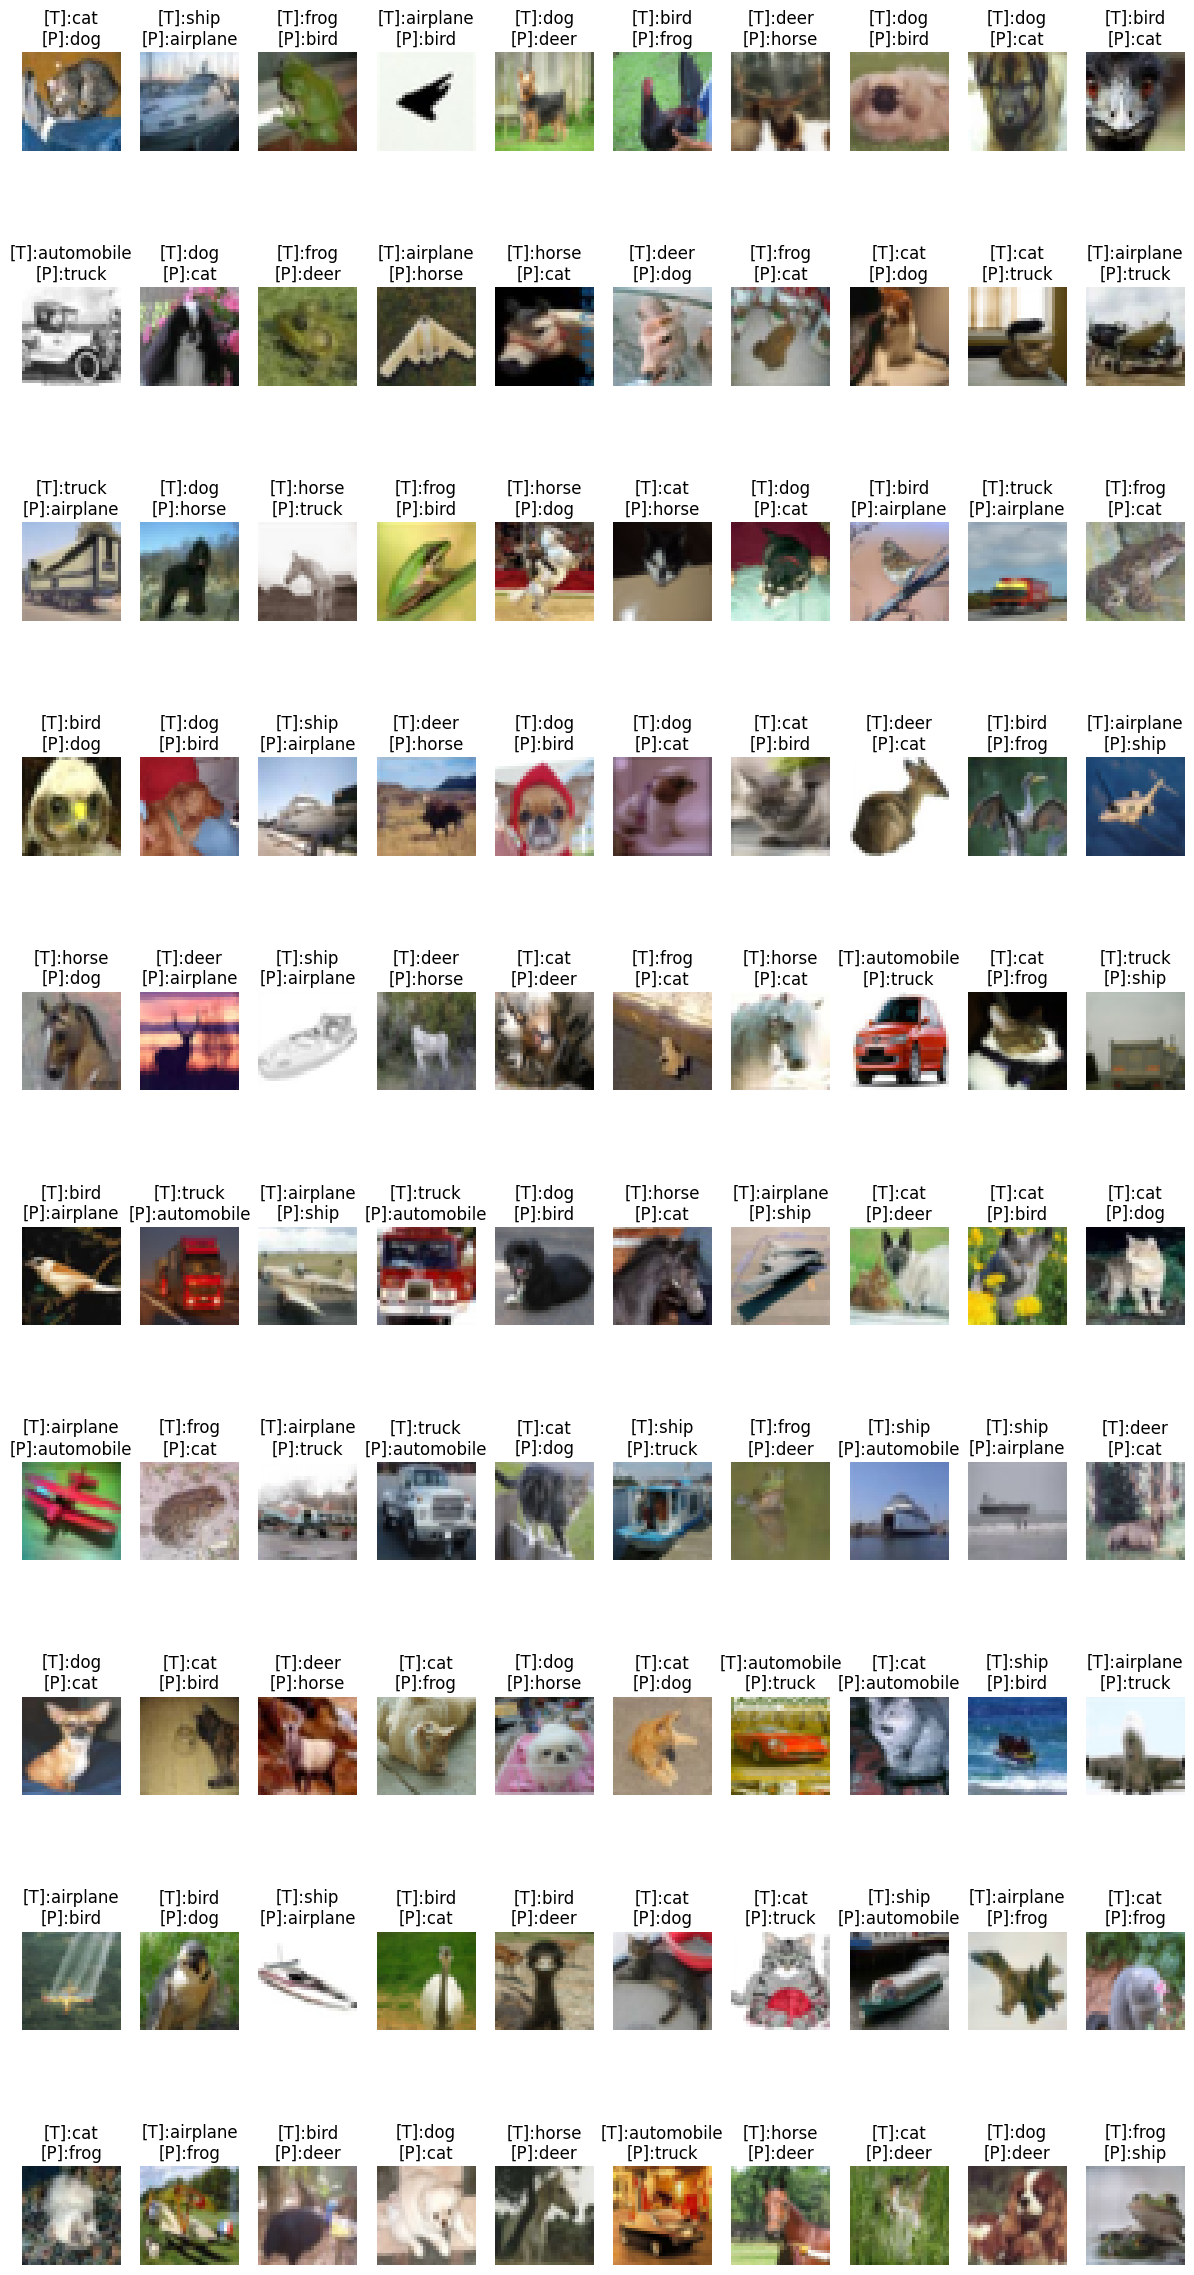

In [12]:
import numpy as np
idx = np.nonzero(y_test != pre)[0]
idx = idx[:100]
plt.figure(figsize=(15, 30))
# 預測錯誤的預測值
fp_pred = pre[idx]
# 預測錯誤的真實值
fp_true = y_test[idx]
# 預測錯誤的圖片
fp_img = x_test[idx]
for i in range(len(idx)):
    plt.subplot(10, 10, i+1)
    plt.axis("off")
    t = "[T]:{}\n[P]:{}".format(trans[fp_true[i]], trans[fp_pred[i]])
    plt.title(t)
    plt.imshow(fp_img[i])

1/1 [==============================] - 0s 204ms/step
airplane 的機率是: 0.2606
automobile 的機率是: 0.0163
bird 的機率是: 0.0114
cat 的機率是: 0.389
deer 的機率是: 1e-04
dog 的機率是: 0.0067
frog 的機率是: 1e-04
horse 的機率是: 0.0071
ship 的機率是: 0.1357
truck 的機率是: 0.1728
最高機率是: cat


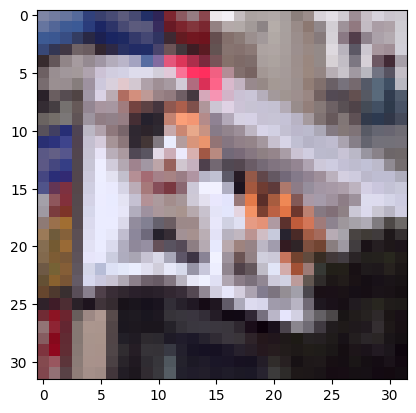

In [13]:
import requests
from PIL import Image
url = "https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/aglzo4nc-1625740186.jpeg?crop=0.665xw:1.00xh;0.133xw,0&resize=640:*" #@param {type:"string"}
h = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36"
}
response = requests.get(url, stream=True, headers=h)

img = Image.open(response.raw).resize((32, 32)).convert("RGB")
img_np = np.array(img)
testx = img_np.reshape(1, 32, 32, 3) / 255.0
probas = model.predict(testx)[0]
for i in range(10):
    print(trans[i], "的機率是:", round(probas[i], 4))
ans = probas.argmax(axis=-1)
print("最高機率是:", trans[ans])
plt.imshow(img_np)
     

1/1 [==============================] - 0s 62ms/step


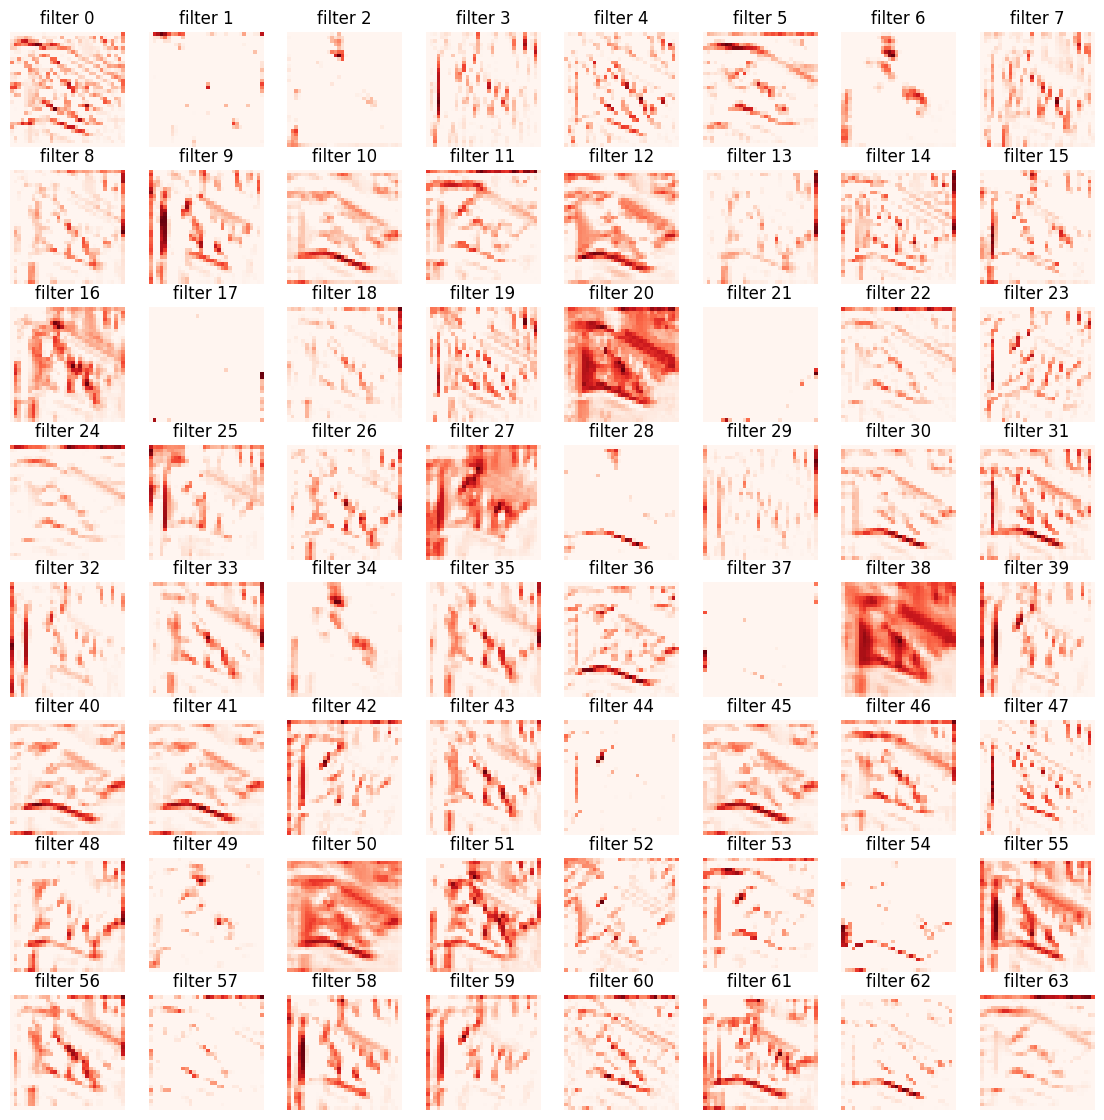

In [14]:
# first layer
layers = [
    model.layers[0]
]
# 256那層
# layers = [
#     model.layers[0],
#     model.layers[2],
#     model.layers[4],
# ]
# 512那層
# layers = [
#     model.layers[0],
#     model.layers[2],
#     model.layers[4],
#     model.layers[6],
# ]
partial = Sequential(layers)
conv = partial.predict(img_np.reshape(1, 32, 32, 3))[0]
plt.figure(figsize=(14, 14))
# 取出64種組合方式的某一個
for i in range(64):
    idx = i
    fil = conv[:,:,i]
    # 0~1
    ma, mi = fil.max(), fil.min()
    fil = (fil - mi) / (ma - mi)
    title = "filter {}".format(i)
    plt.subplot(8, 8, i+1)
    plt.title(title)
    plt.axis("off")
    plt.imshow(fil, cmap="Reds")

In [15]:
# HDFVIEW
#　讀取
import os
from tensorflow.keras.models import load_model
temp = load_model("cnn.h5")
temp.evaluate(x_test_norm, y_test)
# 儲存
model.save("cnn.h5")
# 有的話就讀, 沒有的話就建立模型
if not os.path.exists("cnn.h5"):
    # model = Sequential(layers)
    # model.compile(loss=xxx)
    pass
else:
    model = load_model("cnn.h5") 

313/313 [==============================] - 2s 6ms/step - loss: 0.6954 - accuracy: 0.7870


[0.6953806281089783, 0.7870000004768372]